<a href="https://colab.research.google.com/github/Aldistwn29/projek_marketing_analysis/blob/main/marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statment

Anda seorang data analyst ingin melihat hasil dari campaign, melalui data driven action. di perusahaan iFood.

# Goals

Optimasi Campaign Result terkait penawaran produk baru, sehingga mendapatkan profit yang maksimal di bulan depan dan memahami krakteristik customers yang menerima penawaran produk baru.

In [2]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

# Data Quality Check

- Q1: Apakah ada feature yang data type tidak sesuai?
- Q2: Adakah Duplicate, Missing Value, Outliers? dan bagaimana mengatasinya?
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [3]:
df = pd.read_csv('marketing_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

# Question 1

Apakah ada feature yang tidak sesuai dengan type data?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
      print(col, dtype)
      print(df[col].unique())

  print()

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

Jadi perubahan type data yang kurang masuk akal yaitu feature Income dan DT_customer

In [7]:
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.Income

,Income
0,"$84,835.00"
1,"$57,091.00"
2,"$67,267.00"
3,"$32,474.00"
4,"$21,474.00"
...,...
2235,"$66,476.00"
2236,"$31,056.00"
2237,"$46,310.00"
2238,"$65,819.00"


In [9]:
# Menghilangkan simbol dolar dan koma
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [10]:
# Mengubah type data Income ke Float
df['Income'] = df['Income'].astype('float')

In [11]:
# Mengubah type data Dt_Customer ke Date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Question 2

- Adakah duplicated, Missing Value, Outliers?
- bagaimana mengatasinya?

# Duplicated

In [12]:
df.duplicated().sum()

0

# Missing Value

In [13]:
df.isna().sum().sort_values(ascending=False)

,0
Income,24
ID,0
NumDealsPurchases,0
Complain,0
Response,0
AcceptedCmp2,0
AcceptedCmp1,0
AcceptedCmp5,0
AcceptedCmp4,0
AcceptedCmp3,0


<Axes: xlabel='Income', ylabel='Count'>

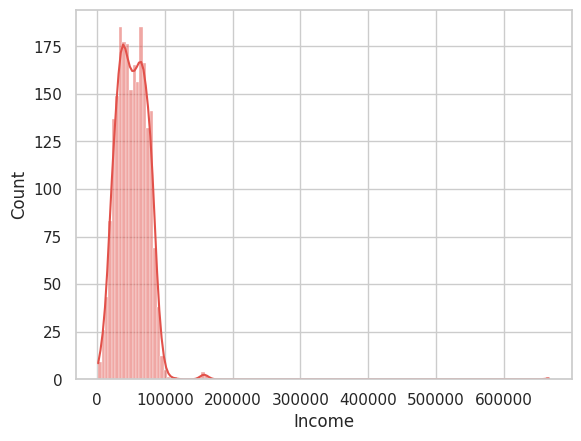

In [14]:
sns.histplot(df['Income'], kde=True)

<Axes: >

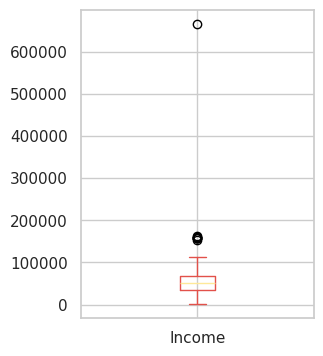

In [15]:
df['Income'].plot(kind='box', figsize=(3, 4))

In [16]:
# Mengisi nilai yang hilang dengan median
df['Income'] = df['Income'].fillna(df['Income'].median())

In [17]:
# Setelah di hapus missing value
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Outlier

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [19]:
df_to_plot = df.select_dtypes(include=['float', 'int'])

In [20]:
df_to_plot.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'], inplace=True)

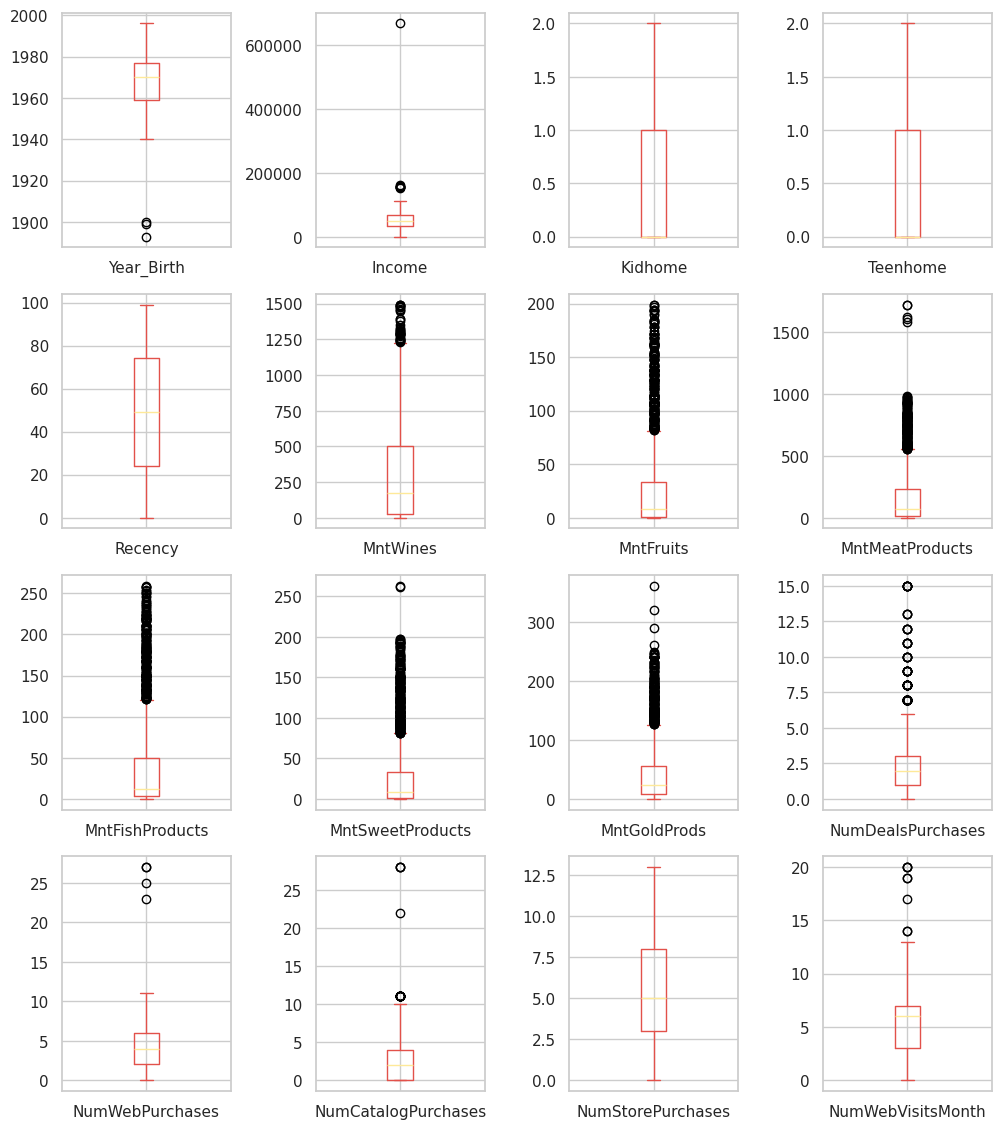

In [21]:
df_to_plot.plot(subplots=True, figsize=(12, 14), kind='box', layout=(4,4))
plt.subplots_adjust(wspace=0.5);

In [22]:
# Mengfilter kolom bridth day
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

# Question 3

Apakah terdapat distribusi yang tidak masuk akal?

In [23]:
numeric = df_to_plot.columns
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

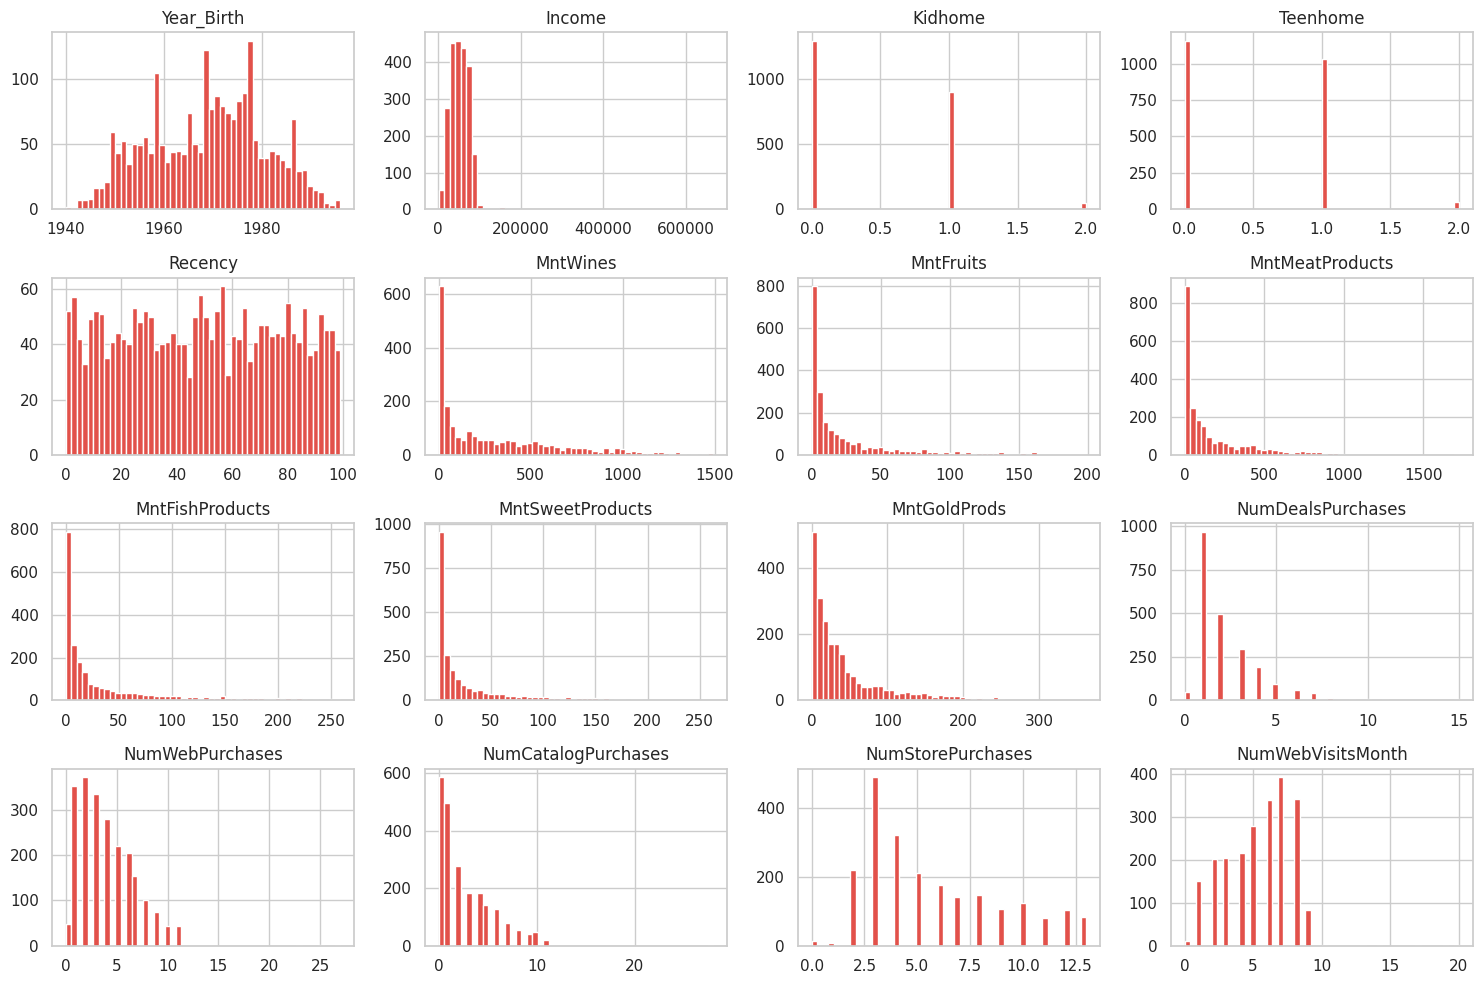

In [24]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

# Data Insight

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [26]:
df['age_customer'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['age_customer'].head()

,age_customer
0,44
1,53
2,56
3,47
4,25


<Axes: xlabel='age_customer', ylabel='Count'>

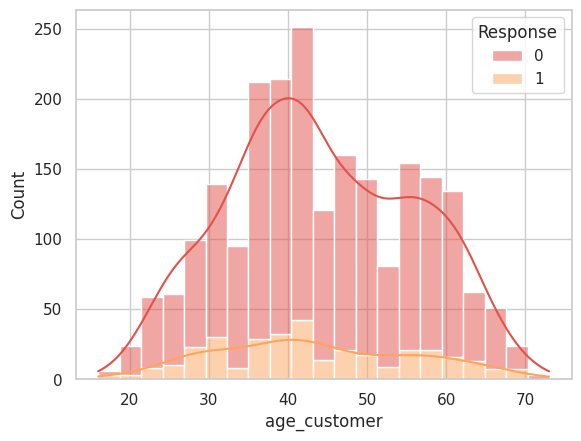

In [27]:
sns.histplot(data=df, x="age_customer", hue="Response", multiple="stack", kde=True)

# Education

In [28]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

<Axes: xlabel='Education', ylabel='count'>

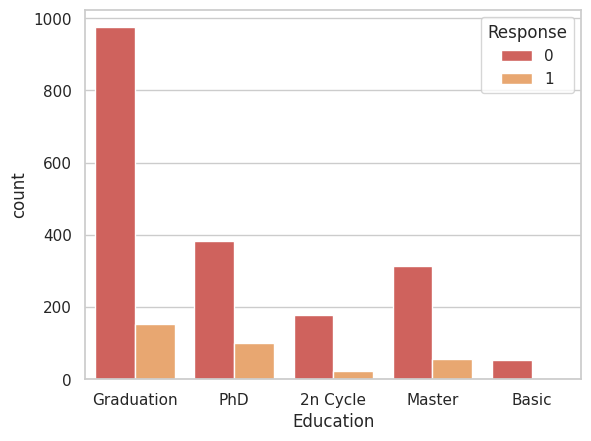

In [29]:
sns.countplot(data=df, x='Education', hue='Response')

In [30]:
# fungsi bar persentasi
def barPerc(df, xVar, ax):
    '''
    barPerc(): Add percentage for huest to bar plots
    args:
        df: pandas dataframe
        xVar: (String) X Variabels
        ax: Axes object (for seaborn Countplot/bar plot or pandas bar plot)
    '''
    # 1 How many X categories
    # check for Nan and remove
    numX = len([x for x in df[xVar].unique() if x==x])
    # 2. the bars are create in hue order, organize them
    bars = ax.patches
    ## 2a. for each X variabel
    for ind in range(numX):
        ## 2.b Get every hue bar
        ## ex. 8 X categoris, 4 hue =>
        ## [0, 8, 16, 24] are hue bars for 1st X categoris
        hueBars = bars[ind:][::numX]
        ## 2C. Get total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        ## 3. print the precentage one the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height() / total:.0%}',
                    ha='center', va='bottom')

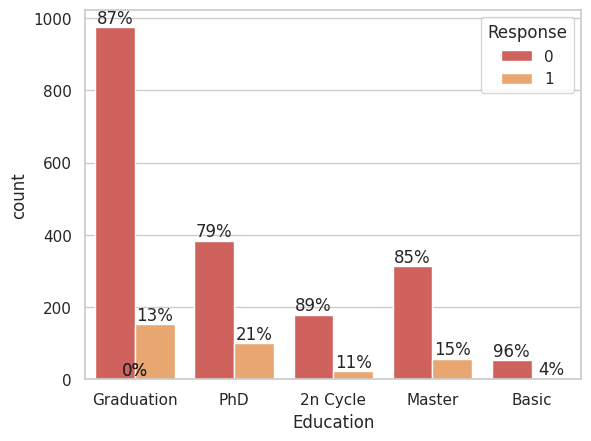

In [31]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

Php memiliki persentasi menyetujui campign

(0.0, 175000.0)

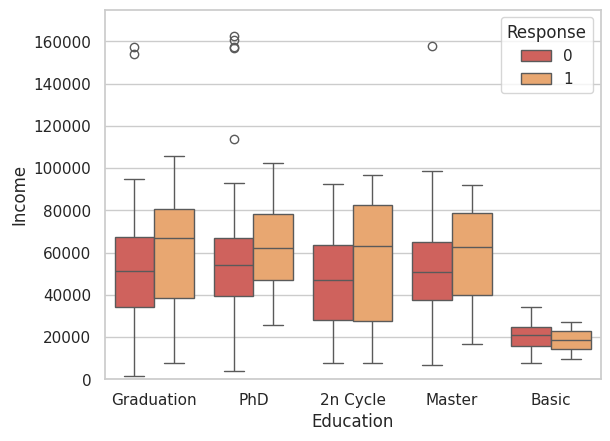

In [32]:
sns.boxplot(data=df, x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

Income yang lebih tinggi cenderung menerima/membeli penawaran campign

# Marital_Status

In [33]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [34]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [35]:
# Menjadikan kategori yolo, alone menjadi Single
df['Marital_Status'] = df['Marital_Status'].apply(lambda x:'Single' if str(x) in['YOLO', 'Alone', 'Absurd'] else str(x))

In [36]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

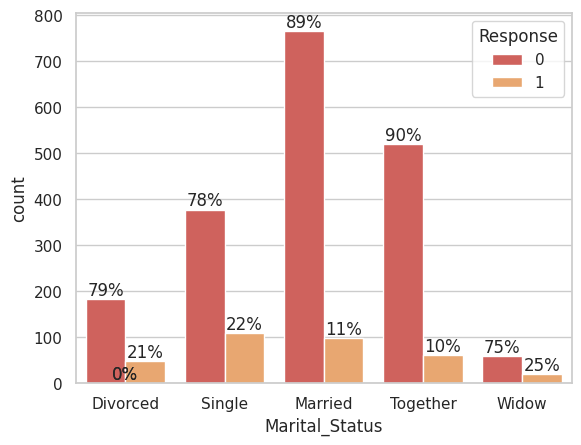

In [37]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

ada kecenderungan customers yang membiayai/hidup sendiri menerima campign.

In [38]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


# Kidhome dan Teenhome

In [39]:
df['num_dependants'] = df['Kidhome'] + df['Teenhome']

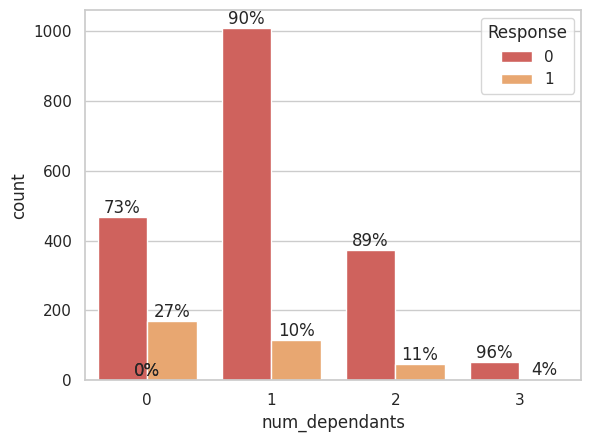

In [40]:
ax = sns.countplot(x='num_dependants', hue='Response', data=df)
barPerc(df, 'num_dependants', ax)

ada kecenderungan customer yang tinggal sendiri menerima/membeli campign.

# Customer Join Date

In [41]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer,num_dependants
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1


In [42]:
df['Dt_Customer_month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_year'] = df['Dt_Customer'].dt.year

In [43]:
df[['Dt_Customer', 'Dt_Customer_month', 'Dt_Customer_year']].head()

,Dt_Customer,Dt_Customer_month,Dt_Customer_year
0,2014-06-16,6,2014
1,2014-06-15,6,2014
2,2014-05-13,5,2014
3,2014-05-11,5,2014
4,2014-04-08,4,2014


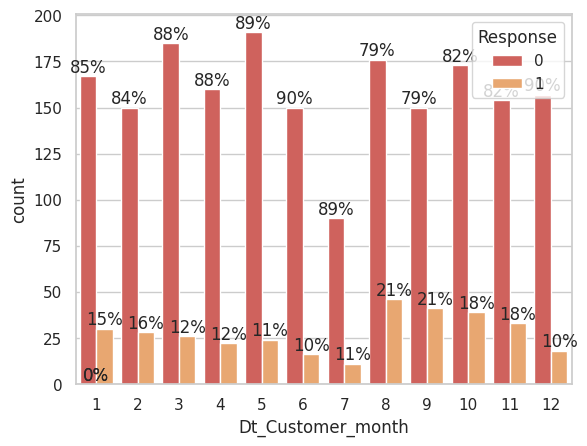

In [44]:
ax = sns.countplot(x='Dt_Customer_month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_month', ax)

pada akhir bulan ada kecendrungan customer yang menerima campign yang sangat tinggi.

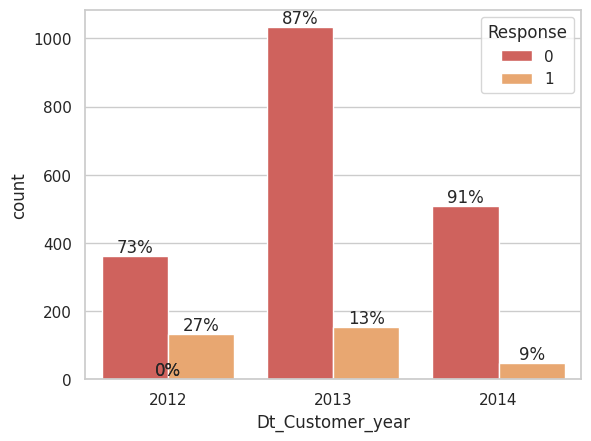

In [45]:
ax = sns.countplot(x='Dt_Customer_year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_year', ax)

Semakin lama customer sudah join, maka semakin besar kemungkinaan besar customer menerima penawaran campign.

# Recency

In [46]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer,num_dependants,Dt_Customer_month,Dt_Customer_year
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014


<Axes: xlabel='Recency', ylabel='Count'>

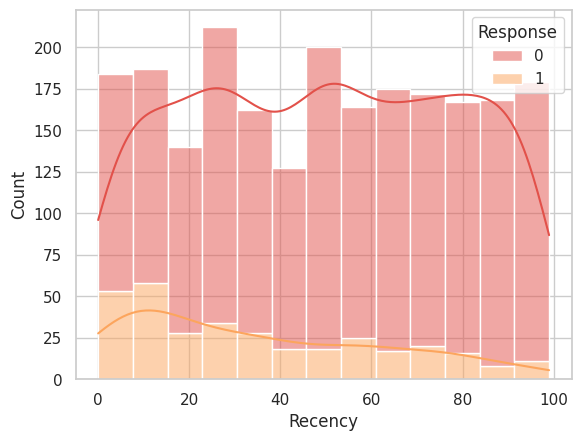

In [47]:
sns.histplot(data=df, x='Recency', hue='Response', kde=True, multiple='stack')

Customer yang belum lama membeli maka ada kecendrungan menerima penawaran campaign terbaru.

# Amount Spent

In [48]:
amt_spend_features = [c for c in df.columns if 'Mnt' in str(c)]
amt_spend_features.append('Response')

In [49]:
df[amt_spend_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


In [50]:
amt_spend_features = [c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spend_features].sum(axis=1)

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

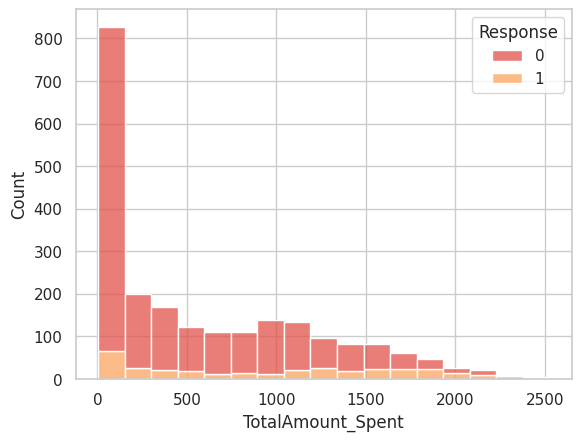

In [51]:
sns.histplot(data=df, x='TotalAmount_Spent', hue='Response', kde=False, multiple='stack')

jika customer nge-spant uangnya di sekitar 100-200 dolar maka customer ini cenderung menerima penawaran campaign.

# Purchases

In [52]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer,num_dependants,Dt_Customer_month,Dt_Customer_year,TotalAmount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91


In [53]:
purchase_features = [c for c in df.columns if 'Purchases' in str(c)]
purchase_features.append('Response')

In [56]:
df[purchase_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


In [58]:
purchase_features = [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchase'] = df[purchase_features].sum(axis=1)

<Axes: xlabel='Total_Purchase', ylabel='Count'>

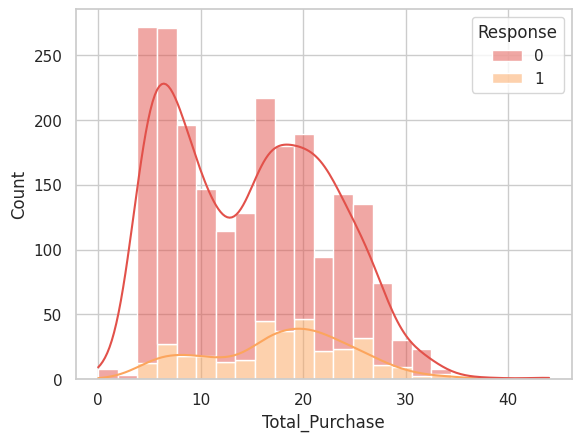

In [61]:
sns.histplot(data=df, x='Total_Purchase', hue='Response', kde=True, multiple='stack')

Tidak ada pola unik, pemisah antara response 0 dan 1

# NumWebVisitsMonth

In [63]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumWebVisitsMonth,-0.004449


Tidak memiliki krolesi terhadap response

# AcceptedCmp

In [64]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age_customer,num_dependants,Dt_Customer_month,Dt_Customer_year,TotalAmount_Spent,Total_Purchase
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,6,2014,1190,15
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,6,2014,577,18
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,5,2014,251,11
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,5,2014,11,4
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,4,2014,91,8


In [65]:
AcceptedCmp_features = [c for c in df.columns if 'AcceptedCmp' in str(c)]
AcceptedCmp_features.append('Response')

In [67]:
df[AcceptedCmp_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


# Complain

In [68]:
df[['Complain', 'Response']].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
Complain,0.000185


Tidak ada korelasi terhadap response

# Country

In [69]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

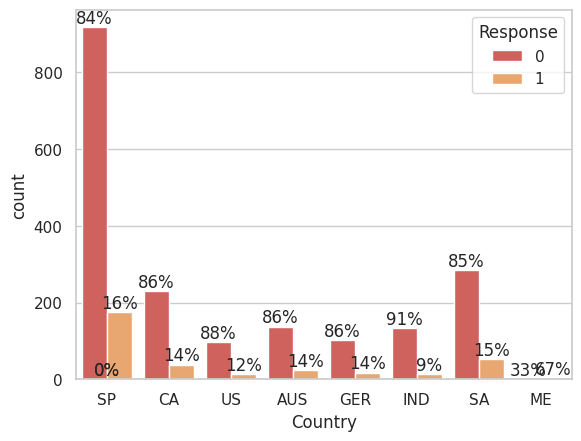

In [75]:
ax = sns.countplot(data=df, x='Country', hue='Response')
barPerc(df, 'Country', ax)

Cutomer yang berasal dari negara maxico dan spain cenderung menerima penawaran campign terbaru

# Modeling